# EDA

In [69]:
# We import the libreries we'll use

# Data manipulation libraries
import pandas as pd
from sklearn.utils import shuffle

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# We load our dataset
df = pd.read_csv('../data/users_behavior.csv')

In [4]:
# We print the first rows
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
#We print general info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
# We print some summaty statistics data
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


**Initial Observations**
- We have a dataset with five variables. Each row represents one client. Each variable represents the number of calls, messages, minutes, and amount of megabytes used per client. We also have a binary variable to know whether the plan of the client is "Ultra" or not. 
- We don't have missing data
- Our range of calls go from 0 to 244 calls.
- Our range of minutes go from 0 to 1632 minutes.
- Our range of messages go from 0 to 244 messages
- Our number of megabytes used goes from 0 to 49745

## Ourliers Analysis

In [7]:
# We create a function to analyze outliers

def outliers(df,col,ylabel=None,color=None):
    sns.boxplot(df,x=col,color=color)
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'''
El IQR de {col} es {IQR}

EL limite inferior de nuestro boxplot es {low_limit}

La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}

El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}

'EL limite superior es de nuestro boxplot es {up_limit}
          
La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}
          
El porcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}
''')

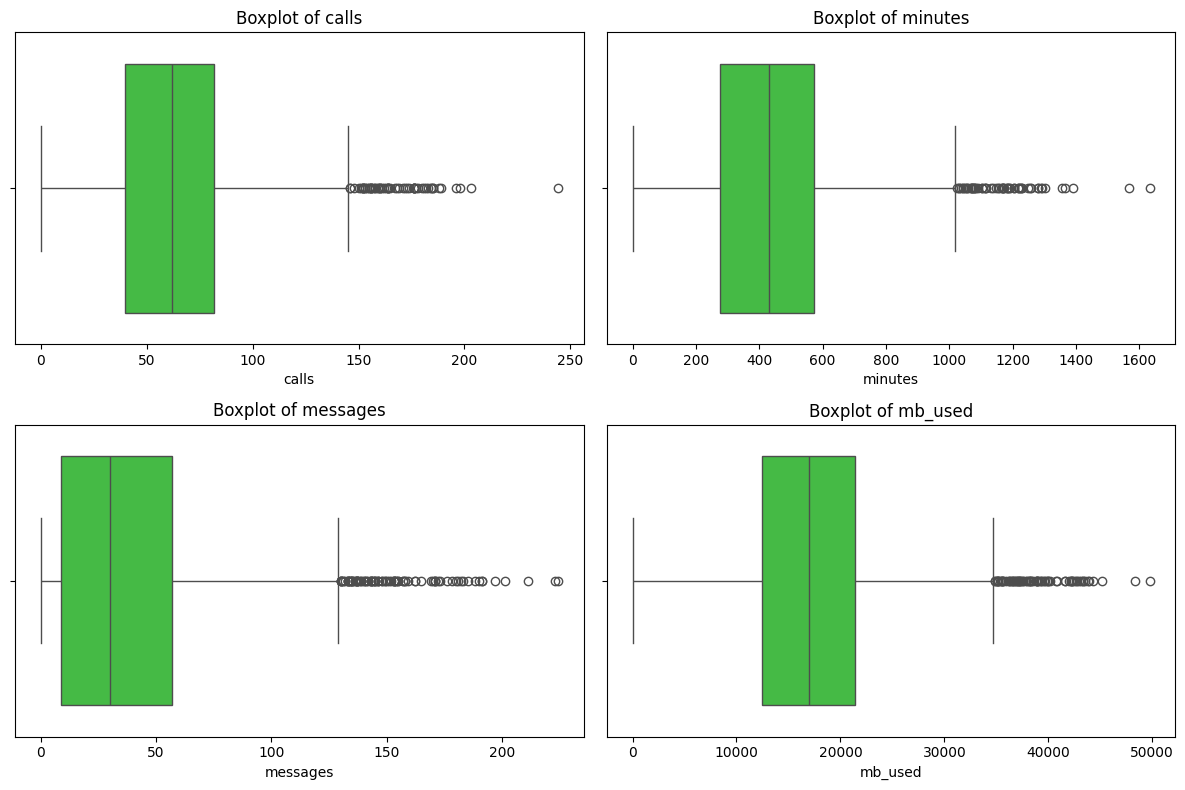

In [8]:
# We create boxplots for each variable 

fig,axs = plt.subplots(2,2,figsize=(12,8))

for idx,column in enumerate(df.drop('is_ultra',axis=1).columns):
    # Determine the subplot index (row and column) based on idx
    i = idx // 2  # Row index (0 or 1)
    k = idx % 2   # Column index (0 or 1)
    axs[i, k].set_title(f'Boxplot of {column}')
    axs[i, k].set_xlabel(column)

    sns.boxplot(df,x=column,ax=axs[i,k],color='limegreen')
plt.tight_layout()
plt.show()



### `calls`

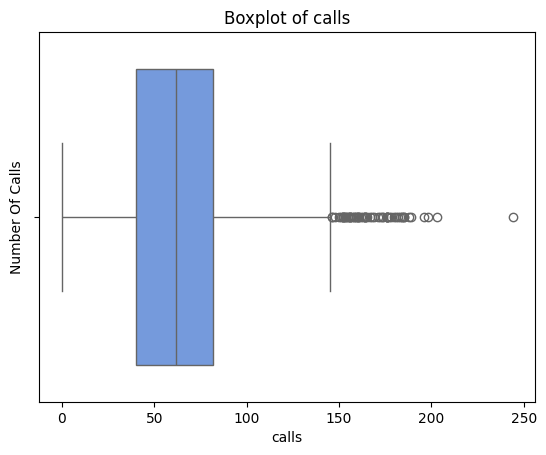

count    3214.000000
mean       63.038892
std        33.236368
min         0.000000
25%        40.000000
50%        62.000000
75%        82.000000
max       244.000000
Name: calls, dtype: float64


El IQR de calls es 42.0

EL limite inferior de nuestro boxplot es -2.0

La cantidad de valores iguales o menores a -2.0 es 0

El porcentaje de valores iguales o menores a -2.0 es 0.00%

'EL limite superior es de nuestro boxplot es 124.0
          
La cantidad de volores iguales o superiores a 124.0 es 134
          
El porcentaje de valores iguales o superiores a 124.0 es 4.17%



In [9]:
# We use our function to analyze our variables further
outliers(df,'calls','Number Of Calls','cornflowerblue')

### `minutes`

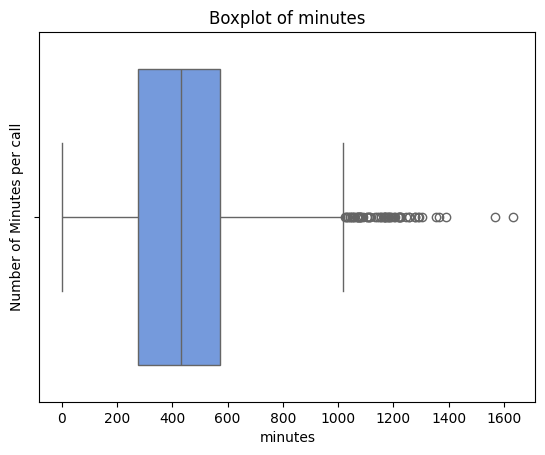

count    3214.000000
mean      438.208787
std       234.569872
min         0.000000
25%       274.575000
50%       430.600000
75%       571.927500
max      1632.060000
Name: minutes, dtype: float64


El IQR de minutes es 297.35249999999985

EL limite inferior de nuestro boxplot es -22.777499999999804

La cantidad de valores iguales o menores a -22.777499999999804 es 0

El porcentaje de valores iguales o menores a -22.777499999999804 es 0.00%

'EL limite superior es de nuestro boxplot es 869.2799999999997
          
La cantidad de volores iguales o superiores a 869.2799999999997 es 130
          
El porcentaje de valores iguales o superiores a 869.2799999999997 es 4.04%



In [10]:
# We use our function with our minutes variable 
outliers(df,'minutes','Number of Minutes per call','cornflowerblue')

### `messages`

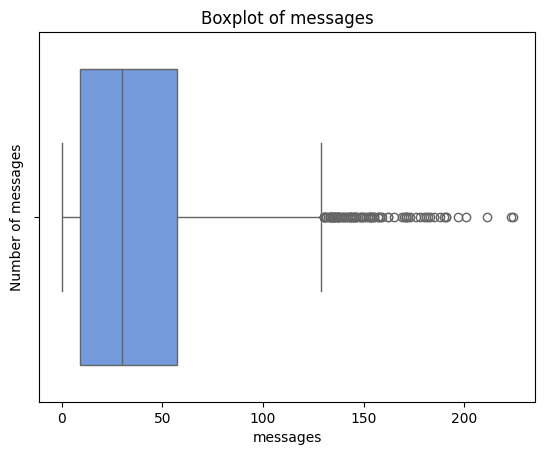

count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages, dtype: float64


El IQR de messages es 48.0

EL limite inferior de nuestro boxplot es -39.0

La cantidad de valores iguales o menores a -39.0 es 0

El porcentaje de valores iguales o menores a -39.0 es 0.00%

'EL limite superior es de nuestro boxplot es 105.0
          
La cantidad de volores iguales o superiores a 105.0 es 171
          
El porcentaje de valores iguales o superiores a 105.0 es 5.32%



In [11]:
outliers(df,'messages','Number of messages','cornflowerblue')

### `mb_used`

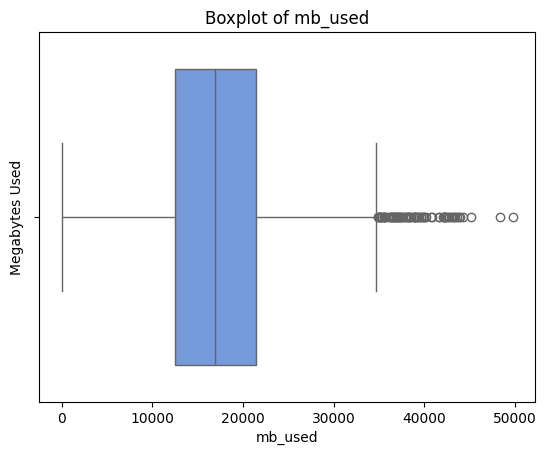

count     3214.000000
mean     17207.673836
std       7570.968246
min          0.000000
25%      12491.902500
50%      16943.235000
75%      21424.700000
max      49745.730000
Name: mb_used, dtype: float64


El IQR de mb_used es 8932.797499999986

EL limite inferior de nuestro boxplot es 3559.1050000000178

La cantidad de valores iguales o menores a 3559.1050000000178 es 124

El porcentaje de valores iguales o menores a 3559.1050000000178 es 3.86%

'EL limite superior es de nuestro boxplot es 30357.497499999976
          
La cantidad de volores iguales o superiores a 30357.497499999976 es 161
          
El porcentaje de valores iguales o superiores a 30357.497499999976 es 5.01%



In [12]:
outliers(df,'mb_used','Megabytes Used','cornflowerblue')

**Observations**
- We have some positive outliers on each variable. That means we have some data on each variable that drives our data to the right. 
- On our `calls` variable, 4.17% of our data are positive outliers.
- On our `minutes` variable, 4.04% of our data are positive outliers.
- On our `messages` variable, 5.32% of our data are positive outliers.
- On our `mb_used` variable, we have 3.86% outliers under 124 and 5.01% outliers over 30357. 
- We'll assume these outliers are not incorrect numbers, so we'll use all the data for our analysis and creation of models. 

## `is_ultra` distribution

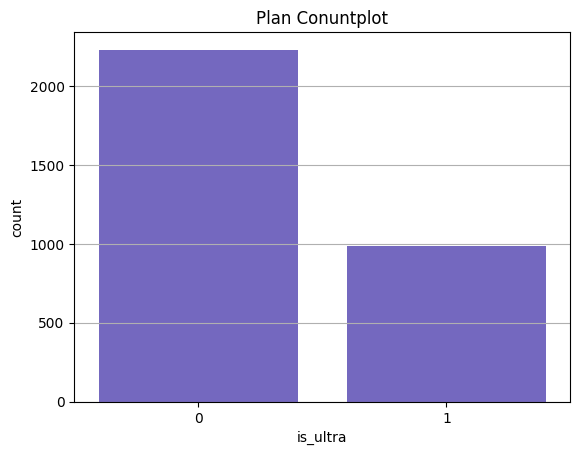

In [13]:
# We create a counplot to analyze the distrubtion of this variable 
sns.countplot(x=df.is_ultra,data=df,color='slateblue')
plt.title('Plan Conuntplot')
plt.grid(True,axis='y')

**Observations**

We can see that this variable is unvalanced. We have more clients from the smart plan. This will be our objective variable so we'll need to find the best way to balance the variable before training our models. 

## Correlation

In [14]:
# We create a correlation matrix
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


<Axes: >

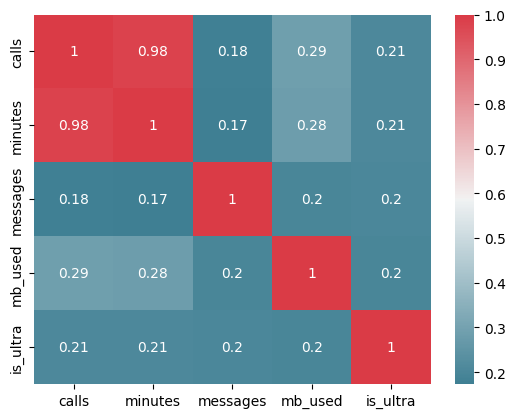

In [15]:
# We create a heatmap to visualize the correlation
sns.heatmap(df.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

**Observations**
- We see that the correlation between our target variable, `is_ultra`, is positive and low. Almost each variable has a 0.2 correlation with our target variable. 
- We see that calls and minutes has a strong positive correlation of 0.98. 

## Feature Relationship

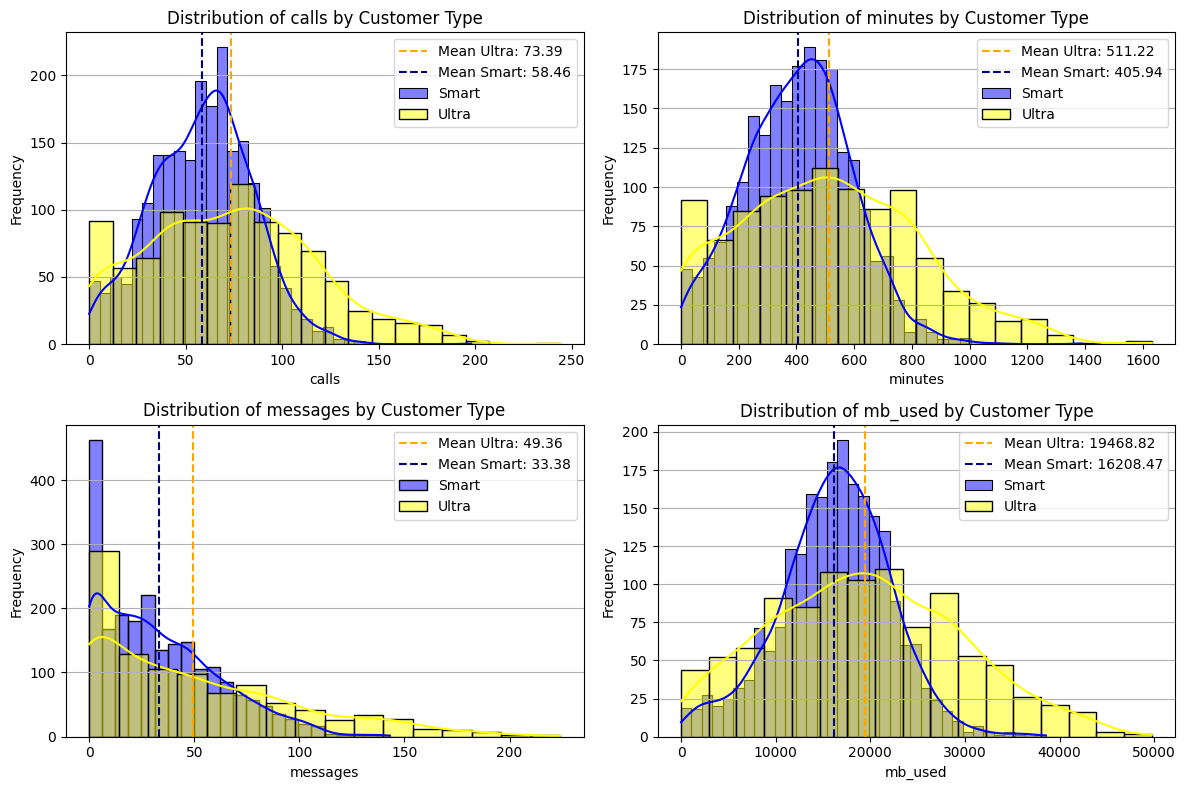

In [17]:
# We create four graphs to visualize the relationship between our target variable and the other variables

fig,axs = plt.subplots(2,2,figsize=(12,8))

for idx,column in enumerate(df.drop('is_ultra',axis=1).columns):
    # Determine the subplot index (row and column) based on idx
    i = idx // 2  # Row index (0 or 1)
    k = idx % 2   # Column index (0 or 1)
    axs[i, k].set_title(f'Boxplot of {column}')
    axs[i, k].set_xlabel(column)
    # We create the graph
    sns.histplot(df.query('is_ultra == 0')[column],label='Smart',alpha=0.5,color='blue',kde=True,ax=axs[i,k])
    sns.histplot(df.query('is_ultra == 1')[column],label='Ultra',alpha=0.5,color='yellow',kde=True,ax=axs[i,k])
    # Add statistical summary (mean) for each group
    mean_smart = df.query('is_ultra == 0')[column].mean()
    mean_ultra = df.query('is_ultra == 1')[column].mean()
    axs[i,k].axvline(mean_ultra, color='orange', linestyle='--', label=f'Mean Ultra: {mean_ultra:.2f}')
    axs[i,k].axvline(mean_smart, color='navy', linestyle='--', label=f'Mean Smart: {mean_smart:.2f}')

   
    axs[i,k].set_title(f'Distribution of {column} by Customer Type')
    axs[i,k].set_ylabel('Frequency')
    axs[i,k].grid(True, axis='y')
    axs[i,k].legend()
    
plt.tight_layout()
plt.show()


**Observations**

- We created for graphs to understand the behavior of each plan, Ultran and Smart. 
- We can see that all four graphs are similar with each variable but with some differences. 
- All four graphs are right skewed. 
- We can see than in all four graphs the mean of people under the Ultra plan is higher than the people under the Smart plan. 



# Models

## Data preparation for model creation

We have one matter to be addressed on this section before creating our models. 

- Our objective variable (`is_ultra`) is unbalanced. Well use the upsample method to fix this. 

### Class Balance

In [19]:
# We create a seed
random_state = 12345

# We split our dataset into target and features 

features = df.drop('is_ultra',axis=1)
target = df.is_ultra

# We split our datasets into train and test
features_train, features_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2,random_state=random_state)

In [70]:
# We create a function to upsample our data

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# We use the function on our data

features_upsampled, target_upsampled = upsample(features_train,target_train,10)

# We split our datasets into train and test
features_train_u, features_test_u, target_train_u, target_test_u = train_test_split(
    features_upsampled, target_upsampled,test_size=0.2,random_state=random_state)

In [22]:
# We create a function to test our models and graph our results

def get_roc_plot_data(y, predictions):
    fpr, tpr, _ = roc_curve(y,
                            predictions,
                            pos_label=None,
                            drop_intermediate=True)
    auc = round(roc_auc_score(y, predictions), 5)

    return fpr, tpr, auc


def plot_roc(custom_axis, y, predictions):

    multiple_curves = isinstance(y, dict)

    custom_axis.axis([-0.01,1.01,0,1.01])
    custom_axis.set(xlabel="False Positive Rate", ylabel="Recall")
    custom_axis.set_title("ROC Curve")

    if not multiple_curves:
        fpr, tpr, auc = get_roc_plot_data(y, predictions)

        custom_axis.plot(fpr, tpr)
        custom_axis.text(0.65, 0.02, 'AUC: ' + str(auc), fontsize=12)
    else:
        for i in range(len(y)):
            model = list(y.keys())[i]
            fpr, tpr, auc = get_roc_plot_data(y[model], predictions[model])

            custom_axis.plot(fpr, tpr, label=model)
            custom_axis.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            custom_axis.text(0.50, 0.02 + i*0.1, f"{model} AUC: {str(auc)}", fontsize=12)

    custom_axis.plot([0,1],[0,1])

    return []

# Models

We'll create our first models using our original data and then we'll use our upsampled data.

## Decision Tree

In [57]:
# We set our param grid with the hyperparameters we'll use
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,4,6],
    'min_samples_split':[2,4,6],
}

grid_seach = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=random_state),param_grid=param_grid,cv=5,scoring='accuracy')

# We train our model
grid_seach.fit(features_train,target_train)

best_score_t = grid_seach.best_score_ #We save the best score on a variable
best_model_t = grid_seach.best_estimator_ # We save the best model on a variable
predict_tree = best_model_t.predict(features_test) # We save the predictions on a variable

# We test our model
accuracy_test_t = accuracy_score(target_test,predict_tree)

# We print the best model and best score 
print(f'''
Best Model: {best_model_t}
Best Score: {best_score_t:.4f}
Accuracy on test:{accuracy_test_t:.4f}
''')


Best Model: DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=12345)
Best Score: 0.7935%
Accuracy on test:0.7823%



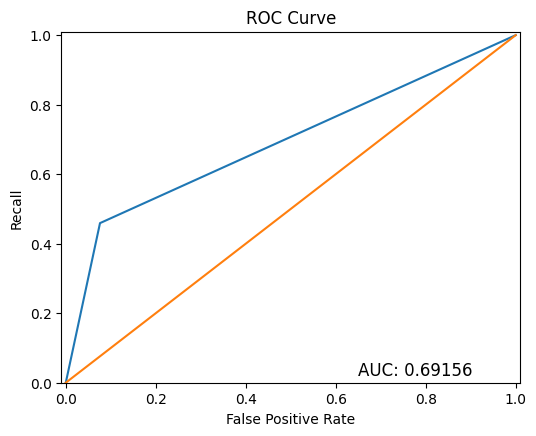

In [55]:
# We also calculate the roc_auc with the function we created 

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_test,
    predictions= predict_tree
)

fig.tight_layout(pad=3.0)

## Random Forest

In [62]:
param_grid = {
    'n_estimators':[20,50,100],
    'max_depth':[None,2,4,6],
    'min_samples_split':[2,4,6]
}

grid_seach = GridSearchCV(
    estimator=RandomForestClassifier(random_state=random_state),param_grid=param_grid,cv=5,scoring='accuracy')

# We train our model
grid_seach.fit(features_train,target_train)

best_params_rf = grid_seach.best_params_ # We save the best params on a variable
best_score_rf = grid_seach.best_score_ # We save the best score on a variable
best_model_rf = grid_seach.best_estimator_ # We save the best model on a variable
predict_rf = best_model_rf.predict(features_test) # We save the predictions of our model on a variable

# We test our model
accuracy_test_rf = accuracy_score(target_test,predict_tree)

print(f'''
Best Model: {best_model_rf}
Best Params: {best_params_rf}
Best Score: {best_score_rf:.4f}
Accuracy on test:{accuracy_test_rf:.4f}
''')


Best Model: RandomForestClassifier(min_samples_split=6, random_state=12345)
Best Params: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}
Best Score: 0.8149%
Accuracy on test:0.7823%



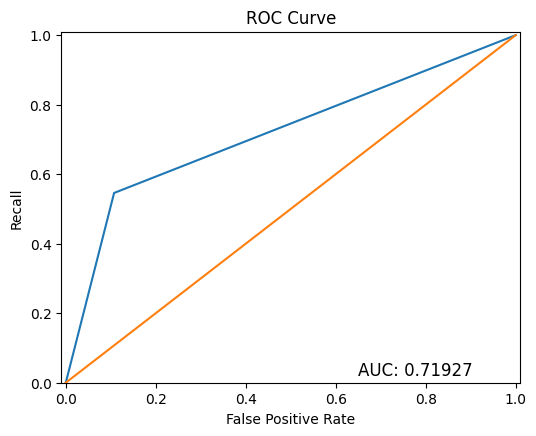

In [63]:
# We also calculate the roc_auc with the function we created 

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_test,
    predictions= predict_rf
)

fig.tight_layout(pad=3.0)

## GradientBoosting

In [66]:
param_grid = {
    'n_estimators':[50,100,150],
    'min_samples_split':[2,4,6],
    'max_depth':[None,1,3],   
}

grid_seach = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=random_state),cv=5,param_grid=param_grid,scoring='accuracy'
)

# We train our model
grid_seach.fit(features_train,target_train)

best_params_gb = grid_seach.best_params_ # We save the best params
best_score_gb = grid_seach.best_score_ # We save the best score
best_model_gb = grid_seach.best_estimator_ # We save the best model
predict_gb = best_model_gb.predict(features_test)

# We test our model
accuracy_test_gb = accuracy_score(target_test,predict_gb)

print(f'''
Best Model: {best_model_gb}
Best Params: {best_params_gb}
Best Score: {best_score_gb:.4f}
Accuracy on test:{accuracy_test_gb:.4f}
''')


Best Model: GradientBoostingClassifier(min_samples_split=4, n_estimators=150,
                           random_state=12345)
Best Params: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 150}
Best Score: 0.8149%
Accuracy on test:0.7916%



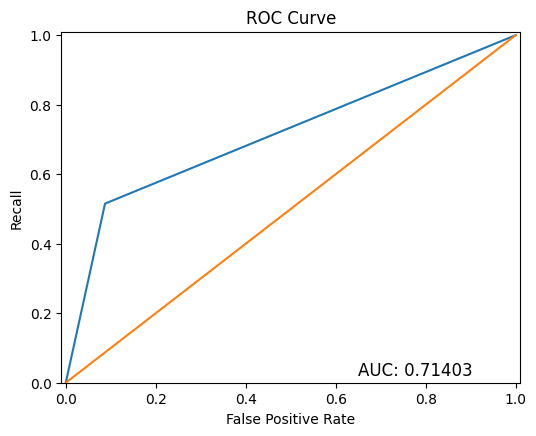

In [67]:
# We also calculate the roc_auc with the function we created 

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_test,
    predictions= predict_gb
)

fig.tight_layout(pad=3.0)

**Observations**

**Decision Tree**
- Best Model: DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=12345)
- Best Score: 0.7935
- Accuracy on test:0.7823
- ROC_AUC: 0.6915

**Random Forest**
- Best Model: RandomForestClassifier(min_samples_split=6, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}
- Best Score: 0.8149
- Accuracy on test:0.7823
- ROC_AUC: 0.7192

**Gradient Boosting**
- Best Model: GradientBoostingClassifier(min_samples_split=4, n_estimators=150,random_state=12345)
- Best Params: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 150}
- Best Score: 0.8149
- Accuracy on test:0.7916
- ROC_AUC: 0.7140

# Models Upsample

## Decision Tree

In [72]:
# We set our param grid with the hyperparameters we'll use
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,4,6],
    'min_samples_split':[2,4,6],
}

grid_seach = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=random_state),param_grid=param_grid,cv=5,scoring='accuracy')

# We train our model
grid_seach.fit(features_train_u,target_train_u)

best_score_t_u = grid_seach.best_score_ #We save the best score on a variable
best_model_t_u = grid_seach.best_estimator_ # We save the best model on a variable
predict_tree_u = best_model_t.predict(features_test_u) # We save the predictions on a variable

# We test our model
accuracy_test_t_u = accuracy_score(target_test_u,predict_tree_u)

# We print the best model and best score 
print(f'''
Best Model: {best_model_t_u}
Best Score: {best_score_t_u:.4f}
Accuracy on test:{accuracy_test_t_u:.4f}
''')


Best Model: DecisionTreeClassifier(criterion='entropy', random_state=12345)
Best Score: 0.9546%
Accuracy on test:0.9612%



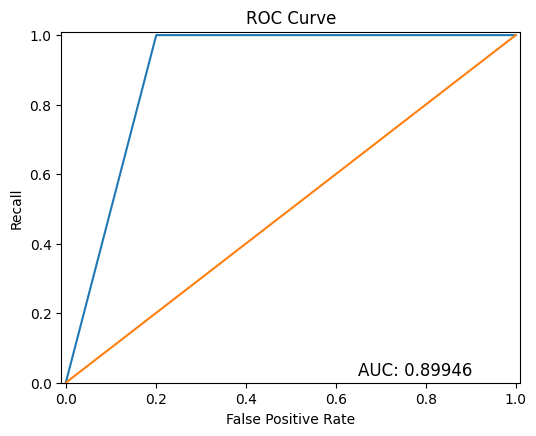

In [73]:
# We also calculate the roc_auc with the function we created 

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_test_u,
    predictions= predict_tree_u
)

fig.tight_layout(pad=3.0)

## Random Forest

In [77]:
param_grid = {
    'n_estimators':[20,50,100],
    'max_depth':[None,2,4,6],
    'min_samples_split':[2,4,6]
}

grid_seach = GridSearchCV(
    estimator=RandomForestClassifier(random_state=random_state),param_grid=param_grid,cv=5,scoring='accuracy')

# We train our model
grid_seach.fit(features_train_u,target_train_u)

best_params_rf_u = grid_seach.best_params_ # We save the best params on a variable
best_score_rf_u = grid_seach.best_score_ # We save the best score on a variable
best_model_rf_u = grid_seach.best_estimator_ # We save the best model on a variable
predict_rf_u = best_model_rf.predict(features_test_u) # We save the predictions of our model on a variable

# We test our model
accuracy_test_rf_u = accuracy_score(target_test_u,predict_tree_u)

print(f'''
Best Model: {best_model_rf_u}
Best Params: {best_params_rf_u}
Best Score: {best_score_rf_u:.4f}
Accuracy on test:{accuracy_test_rf_u:.4f}
''')


Best Model: RandomForestClassifier(min_samples_split=4, n_estimators=20, random_state=12345)
Best Params: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 20}
Best Score: 0.9557%
Accuracy on test:0.9612%



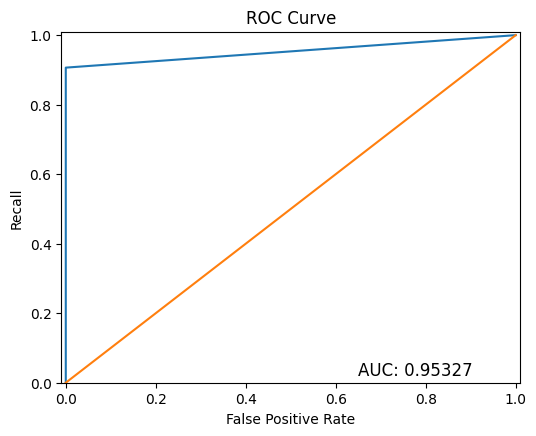

In [79]:
# We also calculate the roc_auc with the function we created 

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_test_u,
    predictions= predict_rf_u
)

fig.tight_layout(pad=3.0)

## Gradient Bossting

In [84]:
param_grid = {
    'n_estimators':[20,50,100],
    'min_samples_split':[2,4,6],
    'max_depth':[None,1,3],   
}

grid_seach = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=random_state),cv=5,param_grid=param_grid,scoring='accuracy'
)

# We train our model
grid_seach.fit(features_train_u,target_train_u)

best_params_gb_u = grid_seach.best_params_ # We save the best params
best_score_gb_u = grid_seach.best_score_ # We save the best score
best_model_gb_u = grid_seach.best_estimator_ # We save the best model
predict_gb_u = best_model_gb.predict(features_test_u)

# We test our model
accuracy_test_gb_u = accuracy_score(target_test_u,predict_gb_u)

print(f'''
Best Model: {best_model_gb_u}
Best Params: {best_params_gb_u}
Best Score: {best_score_gb_u:.4f}
Accuracy on test:{accuracy_test_gb_u:.4f}
''')


Best Model: GradientBoostingClassifier(max_depth=None, min_samples_split=6,
                           random_state=12345)
Best Params: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}
Best Score: 0.9511%
Accuracy on test:0.6801%



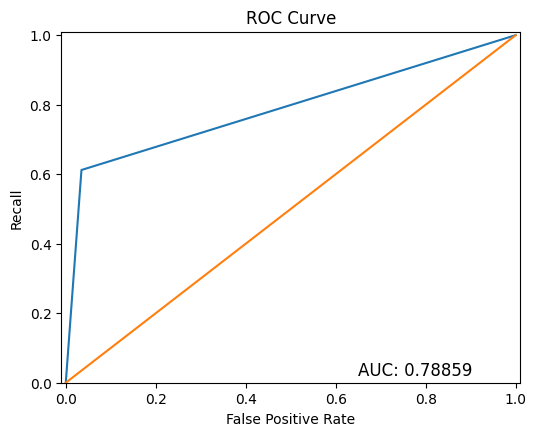

In [85]:
# We also calculate the roc_auc with the function we created 

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_test_u,
    predictions= predict_gb_u
)

fig.tight_layout(pad=3.0)

**Observations**

**Decision Tree Upsampled**
- Best Model: DecisionTreeClassifier(criterion='entropy', random_state=12345)
- Best Score: 0.9546%
- Accuracy on test:0.9612%
- ROC_AUC: 0.8994

**Random Forest Upsampled**
- Best Model: RandomForestClassifier(min_samples_split=4, n_estimators=20, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 20}
- Best Score: 0.9557%
- Accuracy on test:0.9612%
- ROC_AUC: 0.9532

**Gradient Boosting Upsampled**
- Best Model: GradientBoostingClassifier(max_depth=None, min_samples_split=6, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}
- Best Score: 0.9511%
- Accuracy on test:0.6801%
- ROC_AUC: 0.7885

# General Conclusions

**Eda**
We found the following
- We don't have missing data
- Our range of calls go from 0 to 244 calls.
- Our range of minutes go from 0 to 1632 minutes.
- Our range of messages go from 0 to 244 messages
- Our number of megabytes used goes from 0 to 49745
- Our target variable is unbalanced. We have more people on the Smart plan.

**Outliers**
- On our `calls` variable, 4.17% of our data are positive outliers.
- On our `minutes` variable, 4.04% of our data are positive outliers.
- On our `messages` variable, 5.32% of our data are positive outliers.
- On our `mb_used` variable, we have 3.86% outliers under 124 and 5.01% outliers over 30357.

**Correlation**
- We see that the correlation between our target variable, `is_ultra`, is positive and low. Almost each variable has a 0.2 correlation with our target variable. 
- We see that calls and minutes has a strong positive correlation of 0.98.

**Feature Relationship**
- We created for graphs to understand the behavior of each plan, Ultran and Smart. 
- We can see that all four graphs are similar with each variable but with some differences. 
- All four graphs are right skewed. 
- We can see than in all four graphs the mean of people under the Ultra plan is higher than the people under the Smart plan.

**Models**
We use the upsample method to cover the unbalanced target. 

**Frist models**

**Observations**

**Decision Tree**
- Best Model: DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=12345)
- Best Score: 0.7935
- Accuracy on test:0.7823
- ROC_AUC: 0.6915

**Random Forest**
- Best Model: RandomForestClassifier(min_samples_split=6, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}
- Best Score: 0.8149
- Accuracy on test:0.7823
- ROC_AUC: 0.7192

**Gradient Boosting**
- Best Model: GradientBoostingClassifier(min_samples_split=4, n_estimators=150,random_state=12345)
- Best Params: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 150}
- Best Score: 0.8149
- Accuracy on test:0.7916
- ROC_AUC: 0.7140

**Upsampled Models**

**Observations**

**Decision Tree Upsampled**
- Best Model: DecisionTreeClassifier(criterion='entropy', random_state=12345)
- Best Score: 0.9546%
- Accuracy on test:0.9612%
- ROC_AUC: 0.8994

**Random Forest Upsampled**
- Best Model: RandomForestClassifier(min_samples_split=4, n_estimators=20, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 20}
- Best Score: 0.9557%
- Accuracy on test:0.9612%
- ROC_AUC: 0.9532

**Gradient Boosting Upsampled**
- Best Model: GradientBoostingClassifier(max_depth=None, min_samples_split=6, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}
- Best Score: 0.9511%
- Accuracy on test:0.6801%
- ROC_AUC: 0.7885

# Best Model

**Random Forest Upsampled**
- Best Model: RandomForestClassifier(min_samples_split=4, n_estimators=20, random_state=12345)
- Best Params: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 20}
- Best Score: 0.9557%
- Accuracy on test:0.9612%
- ROC_AUC: 0.9532

